In [1]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)

NameError: name 'model_selection' is not defined

In [3]:
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)  #реализация разбиения
kf.get_n_splits(X) #возвращает количество разбиений
kf.split(X) #возвращает индексы для разбиения

<generator object _BaseKFold.split at 0x00000286C5B898C8>

In [4]:
kf

KFold(n_splits=2, random_state=None, shuffle=False)

In [5]:
import pandas as pd

iris_data = pd.read_csv('./iris.data', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [6]:
import gc
gc.collect()

20

In [7]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [8]:
#Теперь визуализируем наше разбиение с помощью специального метода:
import matplotlib.pyplot as plt

def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

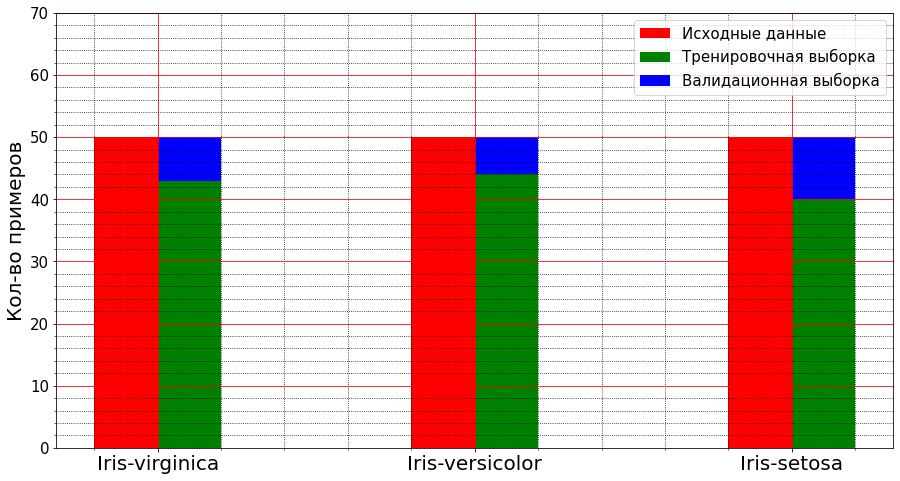

In [9]:
visualize_train_valid_counts(iris_data,train,valid)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

In [11]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

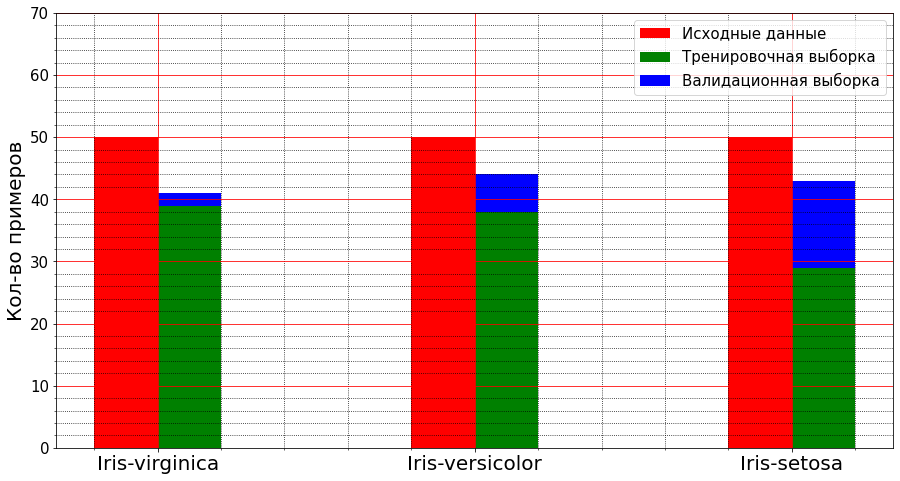

In [12]:
visualize_train_valid_counts(iris_data,train,valid)

In [13]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

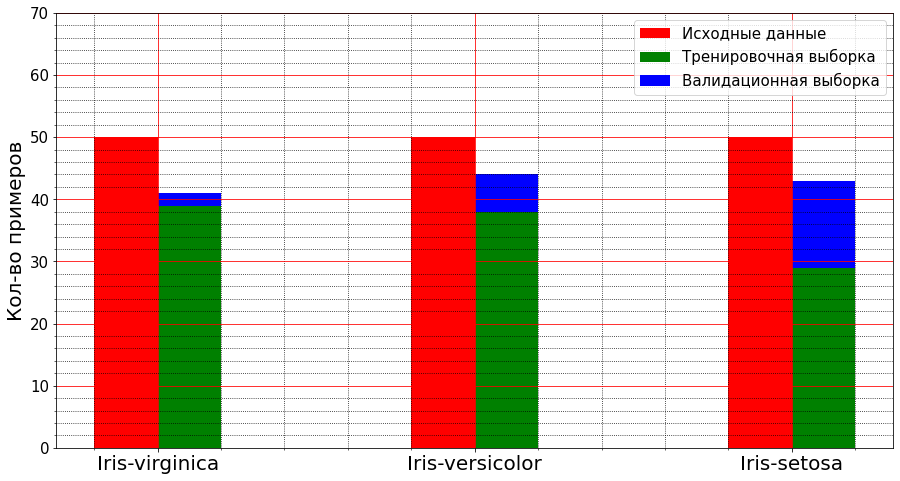

In [14]:
visualize_train_valid_counts(iris_data,train,valid)

In [15]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


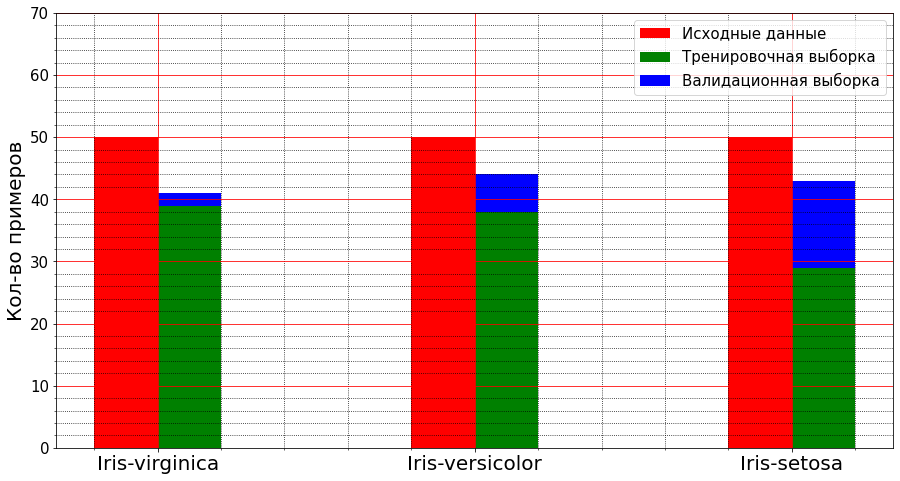

In [16]:
visualize_train_valid_counts(iris_data,train,valid)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = True)
train, test = train_test_split(vis_data, test_size=0.30, shuffle=False)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
from sklearn.metrics import mean_squared_error
true=[1.23,2.35,2.75]
pred=[1.01,12.3,2.74]
(mean_squared_error(true, pred))**0.5

5.746042116100439

In [19]:
vis_data.isnull().sum()

ticket_id                          0
agency_name                        0
inspector_name                     0
violator_name                     34
violation_street_number            0
violation_street_name              0
violation_zip_code            250306
mailing_address_str_number      3602
mailing_address_str_name           4
city                               0
state                             93
zip_code                           1
non_us_str_code               250303
country                            0
ticket_issued_date                 0
hearing_date                   12491
violation_code                     0
violation_description              0
disposition                        0
fine_amount                        1
admin_fee                          0
state_fee                          0
late_fee                           0
discount_amount                    0
clean_up_cost                      0
judgment_amount                    0
payment_amount                     0
b

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("./train.csv", encoding = 'ISO-8859-1', low_memory = True)
vis_data=pd.DataFrame(vis_data[[ 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']])
vis_data=vis_data.dropna(axis=0)
X=vis_data.drop(['balance_due'],axis=1)
Y=vis_data.balance_due.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
LR=LinearRegression().fit(X_train,y_train)
y_predict=LR.predict(X_test)
result=(mean_squared_error(y_test, y_predict))**0.5
result

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


132.08033445901273

In [21]:
vis_data=vis_data.dropna(axis=0)
vis_data.isnull().sum()

fine_amount        0
state_fee          0
late_fee           0
discount_amount    0
balance_due        0
dtype: int64

In [22]:
X=vis_data.drop(['balance_due'],axis=1)
Y=vis_data.balance_due.values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
LR=LinearRegression().fit(X_train,y_train)

In [26]:
y_predict=LR.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
result=(mean_squared_error(y_test, y_predict))**0.5

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

In [2]:
y=[ i for i in range(100)]
x=[ i for i in range(100)]
x[0]=10

In [3]:
accuracy_score(x, y)

0.99

In [4]:
(2*0.6*0.75)/(0.75+0.6)

0.6666666666666665

In [7]:
import numpy as np
y_true=np.array([0, 0, 1, 1, 1, 1, 0, 1])
y_pred=np.array([0, 1, 0, 0, 1, 1, 0, 1])
f1_score(y_true, y_pred)

0.6666666666666665

In [10]:
precision_score([0, 0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 1, 1, 0])

0.4

In [11]:
recall_score([0, 0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 1, 1, 0])

1.0

In [12]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

In [13]:
data=pd.read_csv('./voiceDataSet.xls')

In [14]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


<AxesSubplot:>

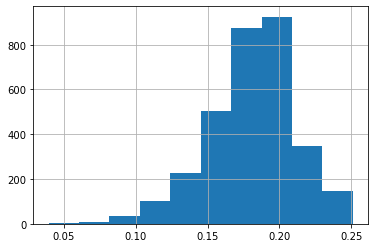

In [16]:
data.meanfreq.hist()

NameError: name 'g1_patch' is not defined

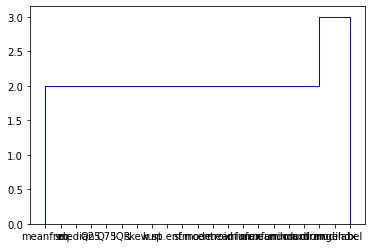

In [19]:
import matplotlib.pyplot as plt
plt.hist(data[data['label']=='male'], color='r', histtype='step', fill=False)
#g1_patch = mpatches.Patch(color='g', label='cent')
plt.hist(data[data['label']=='female'], color='b', histtype='step',  fill=False)
#g2_patch = mpatches.Patch(color='r', label='left')
plt.legend(handles=[g1_patch, g2_patch], loc=2)
#plt.xticks(np.arange(int(min(min(scores_distribution_3), min(scores_distribution_1), min(scores_distribution_2))), int(max(max(scores_distribution_3), max(scores_distribution_2),max(scores_distribution_1)))+1, 2))
plt.xlabel('score', fontsize=18) 
plt.ylabel('frequency', fontsize=18) 
plt.title('example')
klearn.linear_model.LogisticRegressionplt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data=pd.read_csv('./voiceDataSet.xls')
y = (data.label == 'male').astype(int)
X = data.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=42
                                                    )
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = (model.predict(X_test) > .5).astype(int)
print(accuracy_score(y_test, y_pred>.5))

0.9737118822292324


In [22]:
data=pd.read_csv('./glass.xls')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
X = data.drop('Type', axis=1)
y=data.Type
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)
a=cross_val_score(model, X, y, cv=kf, scoring="accuracy")

In [44]:
a.mean()

0.5257575757575758

In [59]:
heart=pd.read_csv('./heart_fin.csv',sep=';',encoding='cp1251')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    int64 
 1   sex       303 non-null    int64 
 2   cp        303 non-null    int64 
 3   trestbps  303 non-null    int64 
 4   chol      303 non-null    int64 
 5   restecg   303 non-null    int64 
 6   thalach   303 non-null    int64 
 7   exang     303 non-null    int64 
 8   oldpeak   303 non-null    object
 9   target    303 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 23.8+ KB


In [61]:
from sklearn.metrics import roc_auc_score

data = pd.read_csv('heart_fin.csv',sep=';',encoding='cp1251')
def del_outliers(df, col_name):
    if df[col_name].dtype != 'object':
        col = df[col_name]
        quant_list = [col.quantile(0.25), col.quantile(0.75)]
        iqr = quant_list[1] - quant_list[0]
        diap_list = [quant_list[0] - 1.5*iqr, quant_list[1] + 1.5*iqr]
        diap_0, diap_1 = diap_list[0], diap_list[1]
        return df.query(f"{diap_0} < {col_name} < {diap_1}")
    else:
        return df
for col in col_list:
    data = del_outliers(data, col)
    
data.drop(columns=['oldpeak'], inplace=True)
X, y = data.drop(columns=['target']).values, data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
res = roc_auc_score(y_test, y_pred_proba)
display(type(res), res.round(3))

numpy.float64

0.825

In [72]:
data = pd.read_csv('heart_fin.csv',sep=';',encoding='cp1251')
data.drop(columns=['oldpeak'], inplace=True)
Q25 = heart.quantile(0.25)
Q75 = heart.quantile(0.75)
IQR = Q75 - Q25
heart_new = heart[~((heart < (Q25 - 1.5 * IQR)) |(heart > (Q75 + 1.5 * IQR))).any(axis=1)]
Q25

age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
restecg       0.0
thalach     133.5
exang         0.0
target        0.0
Name: 0.25, dtype: float64

In [67]:
data = pd.read_csv('heart_fin.csv',sep=';',encoding='cp1251')
def del_outliers(df, col_name):
    if df[col_name].dtype != 'object':
        col = df[col_name]
        quant_list = [col.quantile(0.25), col.quantile(0.75)]
        iqr = quant_list[1] - quant_list[0]
        diap_list = [quant_list[0] - 1.5*iqr, quant_list[1] + 1.5*iqr]
        diap_0, diap_1 = diap_list[0], diap_list[1]
        return df.query(f"{diap_0} < {col_name} < {diap_1}")
    else:
        return df
for col in col_list:
    data = del_outliers(data, col)
data.drop(columns=['oldpeak'], inplace=True)
X, y = data.drop(columns=['target']).values, data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]
res = roc_auc_score(y_test, y_pred_proba)
display(type(res), res.round(3))

numpy.float64

0.769

In [71]:
from sklearn.model_selection import ShuffleSplit
model = KNeighborsClassifier(n_neighbors=3)
sh_split = ShuffleSplit(n_splits=1, random_state=5, test_size=0.15)
res = cross_val_score(model, X, y, cv=sh_split, scoring="roc_auc")
display(type(res), res.round(3))

numpy.ndarray

array([0.554])

In [73]:
1460/11


132.72727272727272